In [78]:
# import files from colab

from google.colab import files


In [ ]:
# Mount drive

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
uploaded = files.upload()


In [82]:
# import libraries-

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [83]:
#Read Data

df = pd.read_csv('/content/drive/MyDrive/LaLiga_Matches.csv')

In [101]:
X = df[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR']]
y = df['FTR']

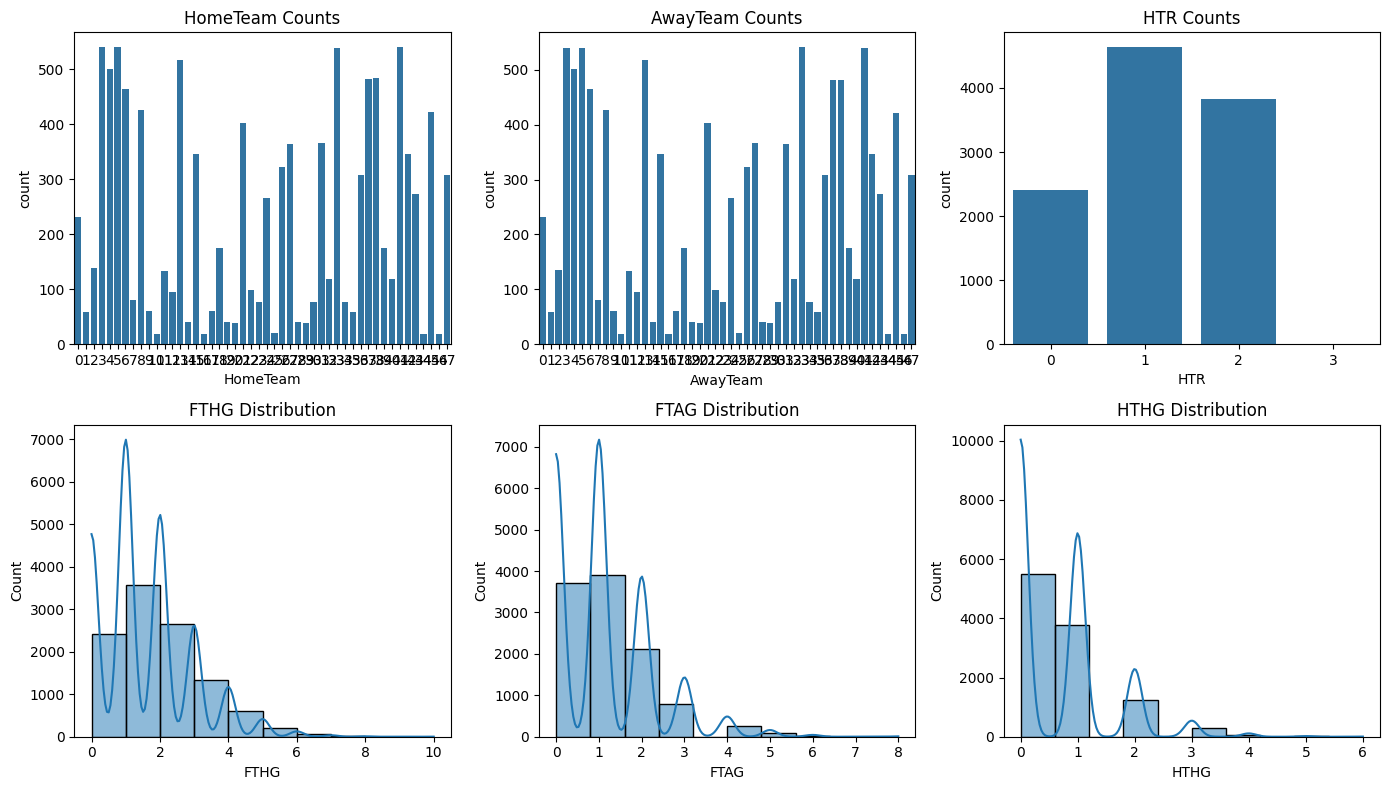

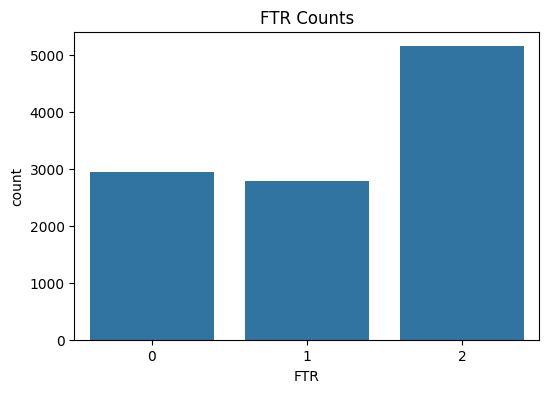

In [102]:
# Visualize categorical features

plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
sns.countplot(x='HomeTeam', data=df)
plt.title('HomeTeam Counts')

plt.subplot(2, 3, 2)
sns.countplot(x='AwayTeam', data=df)
plt.title('AwayTeam Counts')

plt.subplot(2, 3, 3)
sns.countplot(x='HTR', data=df)
plt.title('HTR Counts')

# Visualize numerical features
plt.subplot(2, 3, 4)
sns.histplot(df['FTHG'], bins=10, kde=True)
plt.title('FTHG Distribution')

plt.subplot(2, 3, 5)
sns.histplot(df['FTAG'], bins=10, kde=True)
plt.title('FTAG Distribution')

plt.subplot(2, 3, 6)
sns.histplot(df['HTHG'], bins=10, kde=True)
plt.title('HTHG Distribution')

plt.tight_layout()
plt.show()

# Visualize the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='FTR', data=df)
plt.title('FTR Counts')
plt.show()


In [103]:
# Encode categorical variables

le = LabelEncoder()
categorical_columns = ['HomeTeam', 'AwayTeam', 'FTR', 'HTR']
df[categorical_columns] = df[categorical_columns].apply(le.fit_transform)


In [104]:
# tackle outliers using IQR technique

Q1 = df[['FTHG', 'FTAG', 'HTHG', 'HTAG']].quantile(0.25, numeric_only=True)
Q3 = df[['FTHG', 'FTAG', 'HTHG', 'HTAG']].quantile(0.75, numeric_only=True)

# Calculate the IQR
IQR = Q3 - Q1

# Define a function to filter outliers
def filter_outliers(df):
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Filter outliers from the DataFrame
df_filtered = filter_outliers(df[['FTHG', 'FTAG', 'HTHG', 'HTAG']])


In [105]:
# Split the dataset into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [106]:
# Dropna value

X_train = X_train.dropna()
y_train=y_train.dropna()
y_train = y_train[X_train.index]

In [107]:
X_test = X_test.dropna()
y_test = y_test.dropna()
y_test = y_test[X_test.index]

In [108]:
# Initialize the model

from sklearn.ensemble import RandomForestClassifier


In [109]:
# Define hyperparameter grid

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
# Train the model with the best hyperparameters

best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)


In [111]:
# Evaluate the model

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9990808823529411


In [112]:
# Build a pickle file

import pickle

In [113]:
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [114]:
with open('random_forest_model.pkl', 'rb') as f:
    model_loaded = pickle.load(f)


In [115]:
# Use the loaded model for predictions

y_pred = model_loaded.predict(X_test)

In [116]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9990808823529411
